> # 5조 - 주택전세 가격과 거시경제 변수간의 상관관계<br>
- ## 데이터 병합 및 시각화

In [2]:
# folders라는 변수에 csv 파일만 따로 추출
import os
folders = os.listdir("C:/Users/dhj98/mini_project1/data/result_data")
folders = folders[-5:] # csv파일만 뽑기 위해서
folders

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'C:/Users/dhj98/mini_project1/data/result_data'

In [35]:
# 경로 오류 방지를 위한 경로 설정
#cd C:/Users/dhj98/mini_project1/data/result_data

In [49]:
import pandas as pd
df = pd.DataFrame()

# 폴더에서 반복문을 통해 csv 차례대로 concat하기
for files in folders:
    df_b= pd.read_csv(files,encoding='cp949')
    df = pd.concat([df, df_b],axis=1)
df.head()

# 결과 상 'Unnamed: 0'라는 쓸모 없는 컬럼이 존재함 + datetime이 여러개 존재
# df를 저장할 때, ignore_index or index=False를 이용하면 처음부터 csv로 저장할때 불필요한 컬럼 삭제
# (참고) header 설정을 통해서 컬럼을 취사선택할 수 있음.

,Unnamed: 0,datetime,가계대출금리,Unnamed: 0,datetime,가계예금총금액,Unnamed: 0,datetime,주택매매가격지수,Unnamed: 0,datetime,주택전세가격지수,Unnamed: 0,datetime,취업자수
0,0.0,2000-01-01,10.14,0.0,2000-01-01,194322.4,0,2000-01-01,38.995,0,2000-01-01,37.418,0.0,2000-01-01,20792.0
1,1.0,2000-02-01,10.04,1.0,2000-02-01,205468.8,1,2000-02-01,39.161,1,2000-02-01,38.501,1.0,2000-02-01,20844.0
2,2.0,2000-03-01,10.05,2.0,2000-03-01,208458.2,2,2000-03-01,39.327,2,2000-03-01,39.368,2.0,2000-03-01,20954.0
3,3.0,2000-04-01,9.96,3.0,2000-04-01,212110.6,3,2000-04-01,39.368,3,2000-04-01,39.874,3.0,2000-04-01,20990.0
4,4.0,2000-05-01,9.96,4.0,2000-05-01,215776.1,4,2000-05-01,39.327,4,2000-05-01,39.910,4.0,2000-05-01,21118.0


In [50]:
# 불필요한 'Unnamed: 0'컬럼 삭제
del df['Unnamed: 0']
df.head()

,datetime,가계대출금리,datetime,가계예금총금액,datetime,주택매매가격지수,datetime,주택전세가격지수,datetime,취업자수
0,2000-01-01,10.14,2000-01-01,194322.4,2000-01-01,38.995,2000-01-01,37.418,2000-01-01,20792.0
1,2000-02-01,10.04,2000-02-01,205468.8,2000-02-01,39.161,2000-02-01,38.501,2000-02-01,20844.0
2,2000-03-01,10.05,2000-03-01,208458.2,2000-03-01,39.327,2000-03-01,39.368,2000-03-01,20954.0
3,2000-04-01,9.96,2000-04-01,212110.6,2000-04-01,39.368,2000-04-01,39.874,2000-04-01,20990.0
4,2000-05-01,9.96,2000-05-01,215776.1,2000-05-01,39.327,2000-05-01,39.910,2000-05-01,21118.0


In [51]:
# 'datetime'이라는 불필한 컬럼 제거하기
# 그냥 del을 사용하면 모두 사라진다.
# 단순히 drop + (인덱싱 or 컬럼명)을 이용해도 모두 같은 컬럼으로 인식되는 것이 확인 됨.
print('DF의 컬럼: \n',df.head())
print('\ndrop+컬럼명\n',df.drop('datetime',axis=1).columns)
print('\ndrop+인덱싱\n',df.drop(df.columns[[2,4,6,8]], axis=1).columns)

DF의 컬럼: 
      datetime  가계대출금리    datetime   가계예금총금액    datetime  주택매매가격지수    datetime  \
0  2000-01-01   10.14  2000-01-01  194322.4  2000-01-01    38.995  2000-01-01   
1  2000-02-01   10.04  2000-02-01  205468.8  2000-02-01    39.161  2000-02-01   
2  2000-03-01   10.05  2000-03-01  208458.2  2000-03-01    39.327  2000-03-01   
3  2000-04-01    9.96  2000-04-01  212110.6  2000-04-01    39.368  2000-04-01   
4  2000-05-01    9.96  2000-05-01  215776.1  2000-05-01    39.327  2000-05-01   

   주택전세가격지수    datetime     취업자수  
0    37.418  2000-01-01  20792.0  
1    38.501  2000-02-01  20844.0  
2    39.368  2000-03-01  20954.0  
3    39.874  2000-04-01  20990.0  
4    39.910  2000-05-01  21118.0  

drop+컬럼명
 Index(['가계대출금리', '가계예금총금액', '주택매매가격지수', '주택전세가격지수', '취업자수'], dtype='object')

drop+인덱싱
 Index(['가계대출금리', '가계예금총금액', '주택매매가격지수', '주택전세가격지수', '취업자수'], dtype='object')


In [52]:
# df.drop에 inplace를 사용하지 않았기 때문에 본 df 변경 X
df.head()

,datetime,가계대출금리,datetime,가계예금총금액,datetime,주택매매가격지수,datetime,주택전세가격지수,datetime,취업자수
0,2000-01-01,10.14,2000-01-01,194322.4,2000-01-01,38.995,2000-01-01,37.418,2000-01-01,20792.0
1,2000-02-01,10.04,2000-02-01,205468.8,2000-02-01,39.161,2000-02-01,38.501,2000-02-01,20844.0
2,2000-03-01,10.05,2000-03-01,208458.2,2000-03-01,39.327,2000-03-01,39.368,2000-03-01,20954.0
3,2000-04-01,9.96,2000-04-01,212110.6,2000-04-01,39.368,2000-04-01,39.874,2000-04-01,20990.0
4,2000-05-01,9.96,2000-05-01,215776.1,2000-05-01,39.327,2000-05-01,39.910,2000-05-01,21118.0


In [53]:
# 편하게 컬럼이름 재정의를 위해, 앞으로 datetime을 모음
df=df[['datetime','가계예금총금액','주택매매가격지수','취업자수','가계대출금리','주택전세가격지수']]
df.head()

,datetime,datetime,datetime,datetime,datetime,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
0,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,194322.4,38.995,20792.0,10.14,37.418
1,2000-02-01,2000-02-01,2000-02-01,2000-02-01,2000-02-01,205468.8,39.161,20844.0,10.04,38.501
2,2000-03-01,2000-03-01,2000-03-01,2000-03-01,2000-03-01,208458.2,39.327,20954.0,10.05,39.368
3,2000-04-01,2000-04-01,2000-04-01,2000-04-01,2000-04-01,212110.6,39.368,20990.0,9.96,39.874
4,2000-05-01,2000-05-01,2000-05-01,2000-05-01,2000-05-01,215776.1,39.327,21118.0,9.96,39.910


In [54]:
# 컬럼이름 재정의
df.columns = ['datetime1', 'datetime2', 'datetime3', 'datetime4','datetime', '가계예금총금액', '주택매매가격지수','취업자수','가계대출금리','주택전세가격지수']
df.head()

,datetime1,datetime2,datetime3,datetime4,datetime,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
0,2000-01-01,2000-01-01,2000-01-01,2000-01-01,2000-01-01,194322.4,38.995,20792.0,10.14,37.418
1,2000-02-01,2000-02-01,2000-02-01,2000-02-01,2000-02-01,205468.8,39.161,20844.0,10.04,38.501
2,2000-03-01,2000-03-01,2000-03-01,2000-03-01,2000-03-01,208458.2,39.327,20954.0,10.05,39.368
3,2000-04-01,2000-04-01,2000-04-01,2000-04-01,2000-04-01,212110.6,39.368,20990.0,9.96,39.874
4,2000-05-01,2000-05-01,2000-05-01,2000-05-01,2000-05-01,215776.1,39.327,21118.0,9.96,39.910


In [55]:
# 이름이 달라져 인덱싱을 해도 문제가 생기지 않음.
df.drop(df.columns[[0,1,2,3]], axis=1, inplace=True)
df.head()

,datetime,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
0,2000-01-01,194322.4,38.995,20792.0,10.14,37.418
1,2000-02-01,205468.8,39.161,20844.0,10.04,38.501
2,2000-03-01,208458.2,39.327,20954.0,10.05,39.368
3,2000-04-01,212110.6,39.368,20990.0,9.96,39.874
4,2000-05-01,215776.1,39.327,21118.0,9.96,39.910


In [66]:
# 컬럼 별 NaN값 존재 확인
print('1. DF의 NaN값 존재 확인: \n\n',df.isnull(),'\n')
print('------------------------------------------')
print('2. 컬럼병 NaN값: \n\n',df.isnull().sum(),'\n')
print('------------------------------------------')
print('3. DF의 모든 NaN값: ',df.isnull().sum().sum())

1. DF의 NaN값 존재 확인: 

      datetime  가계예금총금액  주택매매가격지수   취업자수  가계대출금리  주택전세가격지수
0       False    False     False  False   False     False
1       False    False     False  False   False     False
2       False    False     False  False   False     False
3       False    False     False  False   False     False
4       False    False     False  False   False     False
..        ...      ...       ...    ...     ...       ...
269     False    False     False  False   False     False
270     False    False     False  False   False     False
271     False    False     False  False   False     False
272     False     True     False  False    True     False
273      True     True     False   True    True     False

[274 rows x 6 columns] 

------------------------------------------
2. 컬럼병 NaN값: 

 datetime    1
가계예금총금액     2
주택매매가격지수    0
취업자수        1
가계대출금리      2
주택전세가격지수    0
dtype: int64 

------------------------------------------
3. DF의 모든 NaN값:  6


In [67]:
# NaN 존재 이유는 무엇일까?
# 크롤링한 데이터의 기간이 저 시기까지 밖에 없기 때문이다.
df.tail()

,datetime,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
269,2022-06-01,830333.7,100.869,28153.0,4.23,100.928
270,2022-07-01,836014.5,100.869,28172.0,4.53,100.965
271,2022-08-01,836379.2,100.728,28194.0,4.76,100.876
272,2022-09-01,NaN,100.568,28172.0,NaN,100.773
273,NaN,NaN,100.014,NaN,NaN,100.264


In [68]:
# NaN값이 존재하는 행(axis=0)삭제
df.dropna(axis=0,inplace=True)
df.tail()

,datetime,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
0,2000-01-01,194322.4,38.995,20792.0,10.14,37.418
1,2000-02-01,205468.8,39.161,20844.0,10.04,38.501
2,2000-03-01,208458.2,39.327,20954.0,10.05,39.368
3,2000-04-01,212110.6,39.368,20990.0,9.96,39.874
4,2000-05-01,215776.1,39.327,21118.0,9.96,39.910


In [69]:
# 모든 컬럼에 NaN값이 사라짐을 확인
df.isnull().sum()

datetime    0
가계예금총금액     0
주택매매가격지수    0
취업자수        0
가계대출금리      0
주택전세가격지수    0
dtype: int64

In [13]:
df.to_csv('5조.csv',encoding='cp949')
# , index=False를 추가하는게 좋지만 이후 코드 실행을 위해 수정하지 않음

# 필요 모듈 import

In [70]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

## plotly란?
- matplotlib이나 seaborn보다 동적인 라이브러리
- https://plotly.com/python/
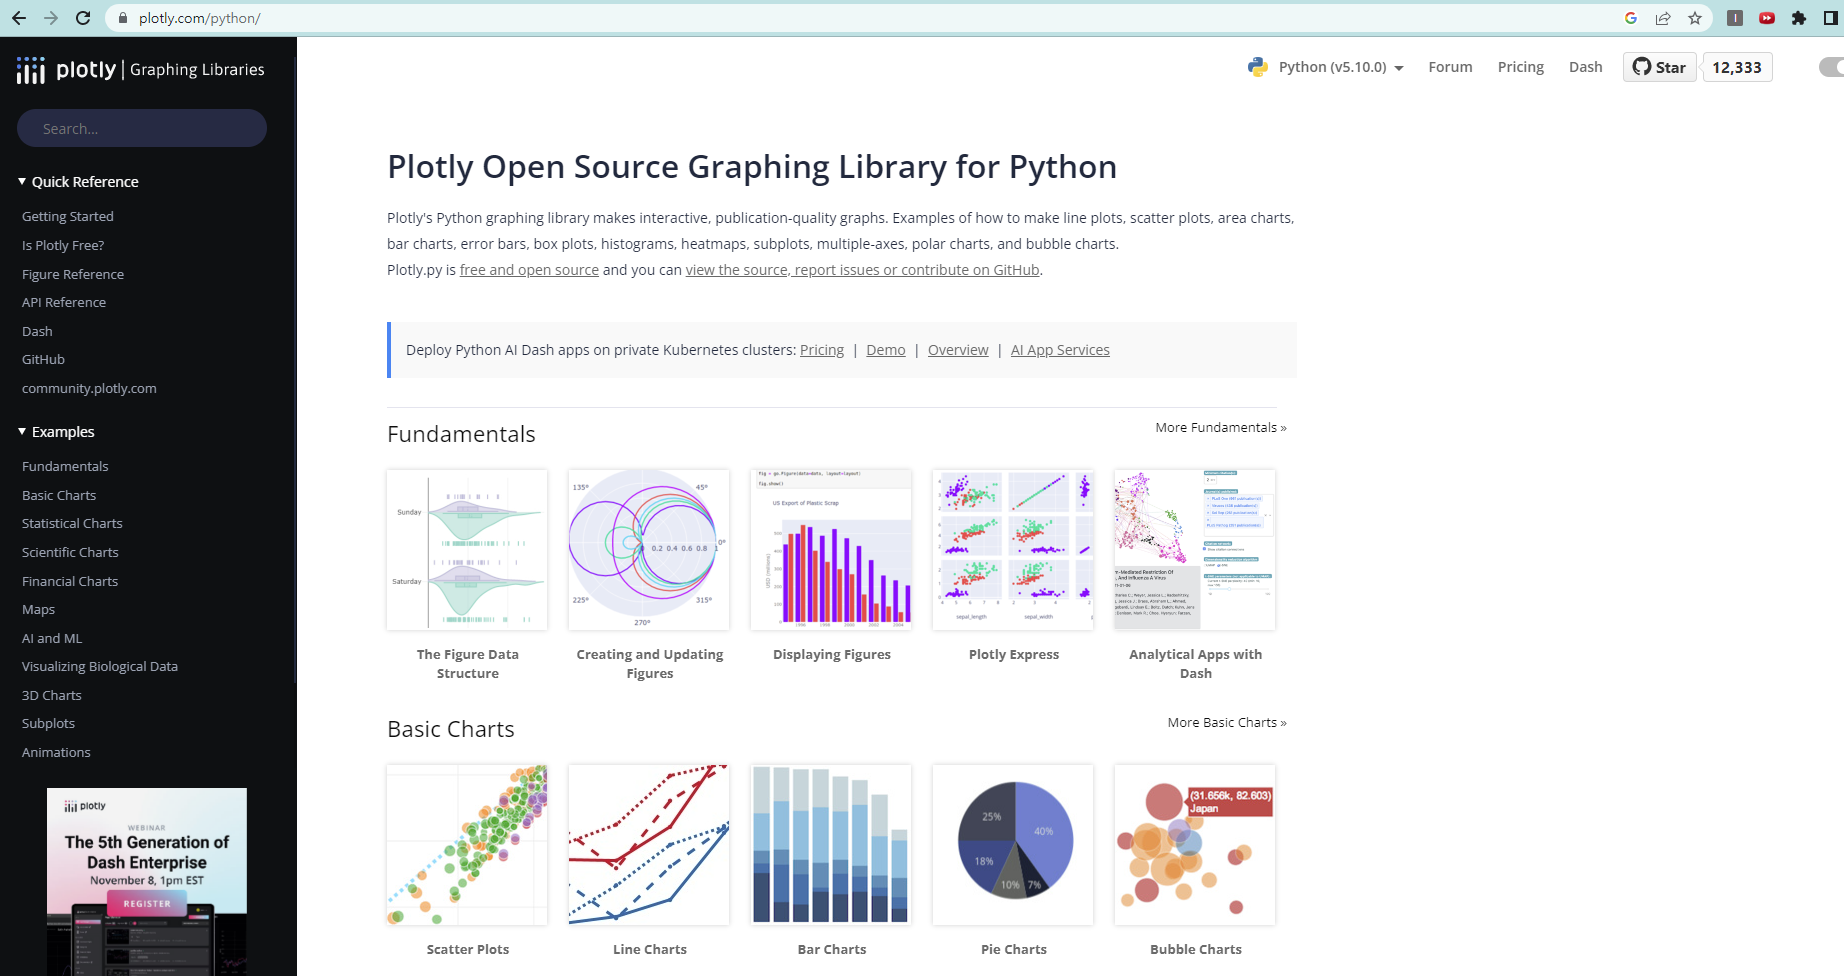

# DF불러오기

In [71]:
df = pd.read_csv('5조.csv',encoding='cp949')

# index = False를 지정하지 않아, 불필요한 컬럼 존재
del df['Unnamed: 0']

# 이후 시각화 편의를 위해 x축에 들어올 'datetime'을 인덱스로 설정
# df.index를 인덱스 조회 가능해짐
df.set_index("datetime",inplace=True)
df.head()

,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
datetime,,,,,
2000-01-01,194322.4,38.995,20792.0,10.14,37.418
2000-02-01,205468.8,39.161,20844.0,10.04,38.501
2000-03-01,208458.2,39.327,20954.0,10.05,39.368
2000-04-01,212110.6,39.368,20990.0,9.96,39.874
2000-05-01,215776.1,39.327,21118.0,9.96,39.910


## 시각화 with plotly

In [1]:
# 데이터 그리기
fig = go.Figure([
    go.Scatter(name="가계예금총금액",x=df.index,y=df['가계예금총금액'],mode='lines',line=dict(color='#ffeead',width=2)),
    go.Scatter(name="주택매매가격지수",x=df.index,y=df['주택매매가격지수'],mode='lines',line=dict(color='#96ceb4',width=2)),
    go.Scatter(name="취업자수",x=df.index,y=df['취업자수'],mode='lines',line=dict(color='#88d8b0',width=2)),
    go.Scatter(name="가계대출금리",x=df.index,y=df['가계대출금리'],mode='lines',line=dict(color='#ffcc5c',width=2)),
    go.Scatter(name="주택전세가격지수",x=df.index,y=df['주택전세가격지수'],mode='lines',line=dict(color='#ff6f69',width = 6))
    ])

# 배경 설정
fig.update_layout(plot_bgcolor='rgb(249,249,249)', margin=dict(l=0, r=0, t=0, b=0))

# 기간 버튼 설정
fig.update_layout(
    title_text='정규화 이전 추이 그래프',
    title_x=0.5,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="한달",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6개월",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1년",
                         step="year",
                         stepmode="backward"),
                    dict(count=1,
                         label="올해",
                         step="year",
                         stepmode="todate"),
                    dict(label="전체(2000.01~2022.08)",
                         step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )


fig.show()

NameError: name 'go' is not defined

## 상관계수 with Heatmap

In [73]:
df_corr_1 = df.corr()
df_corr_1

,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
가계예금총금액,1.000000,0.947513,0.960399,-0.860786,0.979447
주택매매가격지수,0.947513,1.000000,0.963824,-0.844617,0.957685
취업자수,0.960399,0.963824,1.000000,-0.901368,0.983995
가계대출금리,-0.860786,-0.844617,-0.901368,1.000000,-0.884745
주택전세가격지수,0.979447,0.957685,0.983995,-0.884745,1.000000


In [74]:
fig = px.imshow(df_corr_1,text_auto=True, color_continuous_scale='RdBu_r',title='일반화 이전_상관관계 히트맵')
fig.show()

# 원하는 기간만큼 슬라이싱을 통해 기간 설정

In [81]:
df_ex = df['2007-01':'2012-01']
df_ex.head()

,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
datetime,,,,,
2007-01-01,0.181218,0.348337,0.361104,0.480896,0.266338
2007-02-01,0.184841,0.351893,0.362853,0.487484,0.268888
2007-03-01,0.182938,0.353703,0.366756,0.496706,0.272381
2007-04-01,0.184165,0.354979,0.364603,0.494071,0.275434
2007-05-01,0.176991,0.355303,0.365545,0.505929,0.275953


In [82]:
# 데이터 그리기
fig = go.Figure([
    go.Scatter(name="가계예금총금액",x=df_ex.index,y=df_ex['가계예금총금액'],mode='lines',line=dict(color='#ffeead',width=2)),
    go.Scatter(name="주택매매가격지수",x=df_ex.index,y=df_ex['주택매매가격지수'],mode='lines',line=dict(color='#96ceb4',width=2)),
    go.Scatter(name="취업자수",x=df_ex.index,y=df_ex['취업자수'],mode='lines',line=dict(color='#88d8b0',width=2)),
    go.Scatter(name="가계대출금리",x=df_ex.index,y=df_ex['가계대출금리'],mode='lines',line=dict(color='#ffcc5c',width=2)),
    go.Scatter(name="주택전세가격지수",x=df_ex.index,y=df_ex['주택전세가격지수'],mode='lines',line=dict(color='#ff6f69',width = 6))
    ])

# 배경 설정
fig.update_layout(plot_bgcolor='rgb(249,249,249)', margin=dict(l=0, r=0, t=0, b=0))

# 버튼 생성
fig.update_layout(
    title_text='일반화 이전 추이 그래프',
    title_x=0.5,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="한달",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6개월",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1년",
                         step="year",
                         stepmode="backward"),
                    dict(count=1,
                         label="올해",
                         step="year",
                         stepmode="todate"),
                    dict(label="전체(2006.01~2012.01)",
                         step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )


fig.show()

# 일반화 이후

In [77]:
# 일반화 이전 그래프는 가계예금총금액이 너무 커서, 다른 지표들을 보기에 비율이 맞지 않았음
# 이에 따라 모든 지표를 0~1의 비율로 맞춰서 비교하기 좋게 만들었음.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[:] = scaler.fit_transform(df[:])
df.head()

,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
datetime,,,,,
2000-01-01,0.000000,0.000000,0.000000,1.000000,0.000000
2000-02-01,0.017360,0.002683,0.006999,0.986825,0.017043
2000-03-01,0.022016,0.005366,0.021803,0.988142,0.030686
2000-04-01,0.027705,0.006028,0.026649,0.976285,0.038649
2000-05-01,0.033414,0.005366,0.043876,0.976285,0.039215


## 시각화 with plotly

In [78]:
fig = go.Figure([
    go.Scatter(name="가계예금총금액",x=df.index,y=df['가계예금총금액'],mode='lines',line=dict(color='#ffeead',width=2)),
    go.Scatter(name="주택매매가격지수",x=df.index,y=df['주택매매가격지수'],mode='lines',line=dict(color='#96ceb4',width=2)),
    go.Scatter(name="취업자수",x=df.index,y=df['취업자수'],mode='lines',line=dict(color='#88d8b0',width=2)),
    go.Scatter(name="가계대출금리",x=df.index,y=df['가계대출금리'],mode='lines',line=dict(color='#ffcc5c',width=2)),
    go.Scatter(name="주택전세가격지수",x=df.index,y=df['주택전세가격지수'],mode='lines',line=dict(color='#ff6f69',width = 6))
    ])
fig.update_layout(plot_bgcolor='rgb(249,249,249)', margin=dict(l=0, r=0, t=0, b=0))

fig.update_layout(
    title_text='일반화 이전 추이 그래프',
    title_x=0.5,
        xaxis=dict(
            rangeselector=dict(
                buttons=list([
                    dict(count=1,
                         label="한달",
                         step="month",
                         stepmode="backward"),
                    dict(count=6,
                         label="6개월",
                         step="month",
                         stepmode="backward"),
                    dict(count=1,
                         label="1년",
                         step="year",
                         stepmode="backward"),
                    dict(count=1,
                         label="올해",
                         step="year",
                         stepmode="todate"),
                    dict(label="전체(2000.01~2022.08)",
                         step="all")
                ])
            ),
            rangeslider=dict(
                visible=True
            ),
            type="date"
        )
    )

fig.show()

## 상관계수 with Heatmap

In [79]:
df_corr_2 = df.corr()
df_corr_2

,가계예금총금액,주택매매가격지수,취업자수,가계대출금리,주택전세가격지수
가계예금총금액,1.000000,0.947513,0.960399,-0.860786,0.979447
주택매매가격지수,0.947513,1.000000,0.963824,-0.844617,0.957685
취업자수,0.960399,0.963824,1.000000,-0.901368,0.983995
가계대출금리,-0.860786,-0.844617,-0.901368,1.000000,-0.884745
주택전세가격지수,0.979447,0.957685,0.983995,-0.884745,1.000000


In [80]:
fig = px.imshow(df_corr_2,text_auto=True, color_continuous_scale='RdBu_r',title='일반화 이후_상관관계 히트맵')
fig.show()

- Min-MAX Scaling을 진행한다고 해서, 상관계수가 변하지 않음을 알 수 있음
- 그래프와 같이, 가계대출금리만 y값인 주택 전세가격지수와 음의 상관관계를 가짐을 알 수 있다
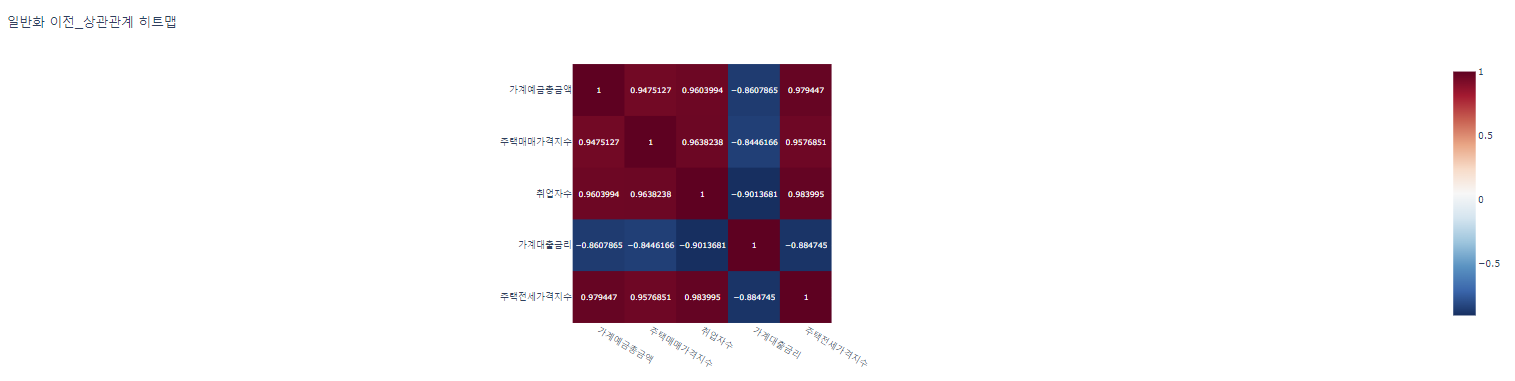<br>
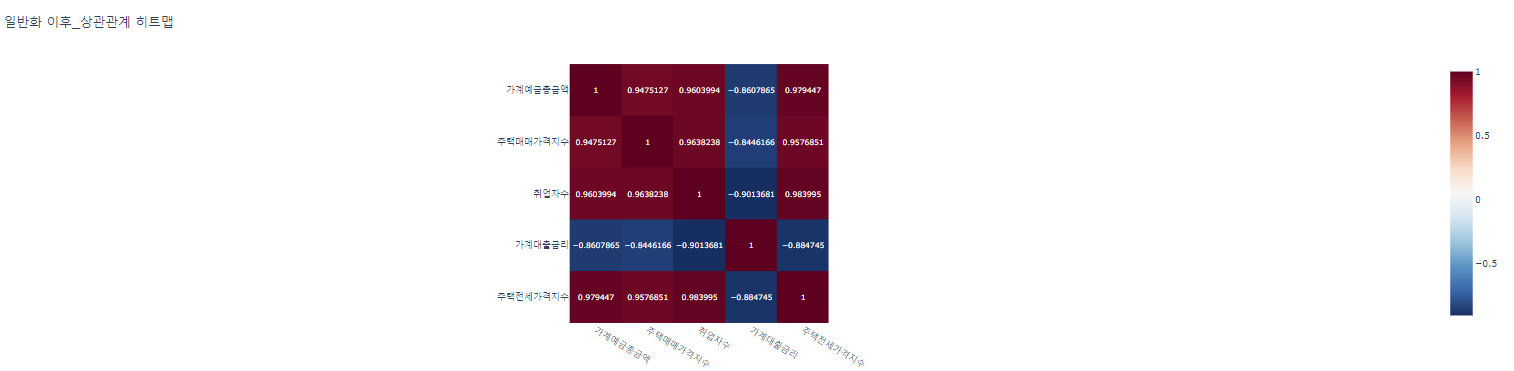

> # 감사합니다